In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Run before importing K-means
import os
os.environ["OMP_NUM_THREADS"]='1'

In [3]:
dataset=pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
dataset.columns = ['Area','Perimeter','Compactness','Kernal_Length','kernel_Width','Asymmetry_coefficient','kernel_groove_length','Wheat_variety']

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Perimeter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Kernal_Length          210 non-null    float64
 4   kernel_Width           210 non-null    float64
 5   Asymmetry_coefficient  210 non-null    float64
 6   kernel_groove_length   210 non-null    float64
 7   Wheat_variety          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [17]:
dataset['Wheat_variety'].value_counts()

1    70
2    70
3    70
Name: Wheat_variety, dtype: int64

In [18]:
dataset.isnull().sum()

Area                     0
Perimeter                0
Compactness              0
Kernal_Length            0
kernel_Width             0
Asymmetry_coefficient    0
kernel_groove_length     0
Wheat_variety            0
dtype: int64

In [6]:
dataset.describe()

,Area,Perimeter,Compactness,Kernal_Length,kernel_Width,Asymmetry_coefficient,kernel_groove_length,Wheat_variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
dataset.head()

,Area,Perimeter,Compactness,Kernal_Length,kernel_Width,Asymmetry_coefficient,kernel_groove_length,Wheat_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


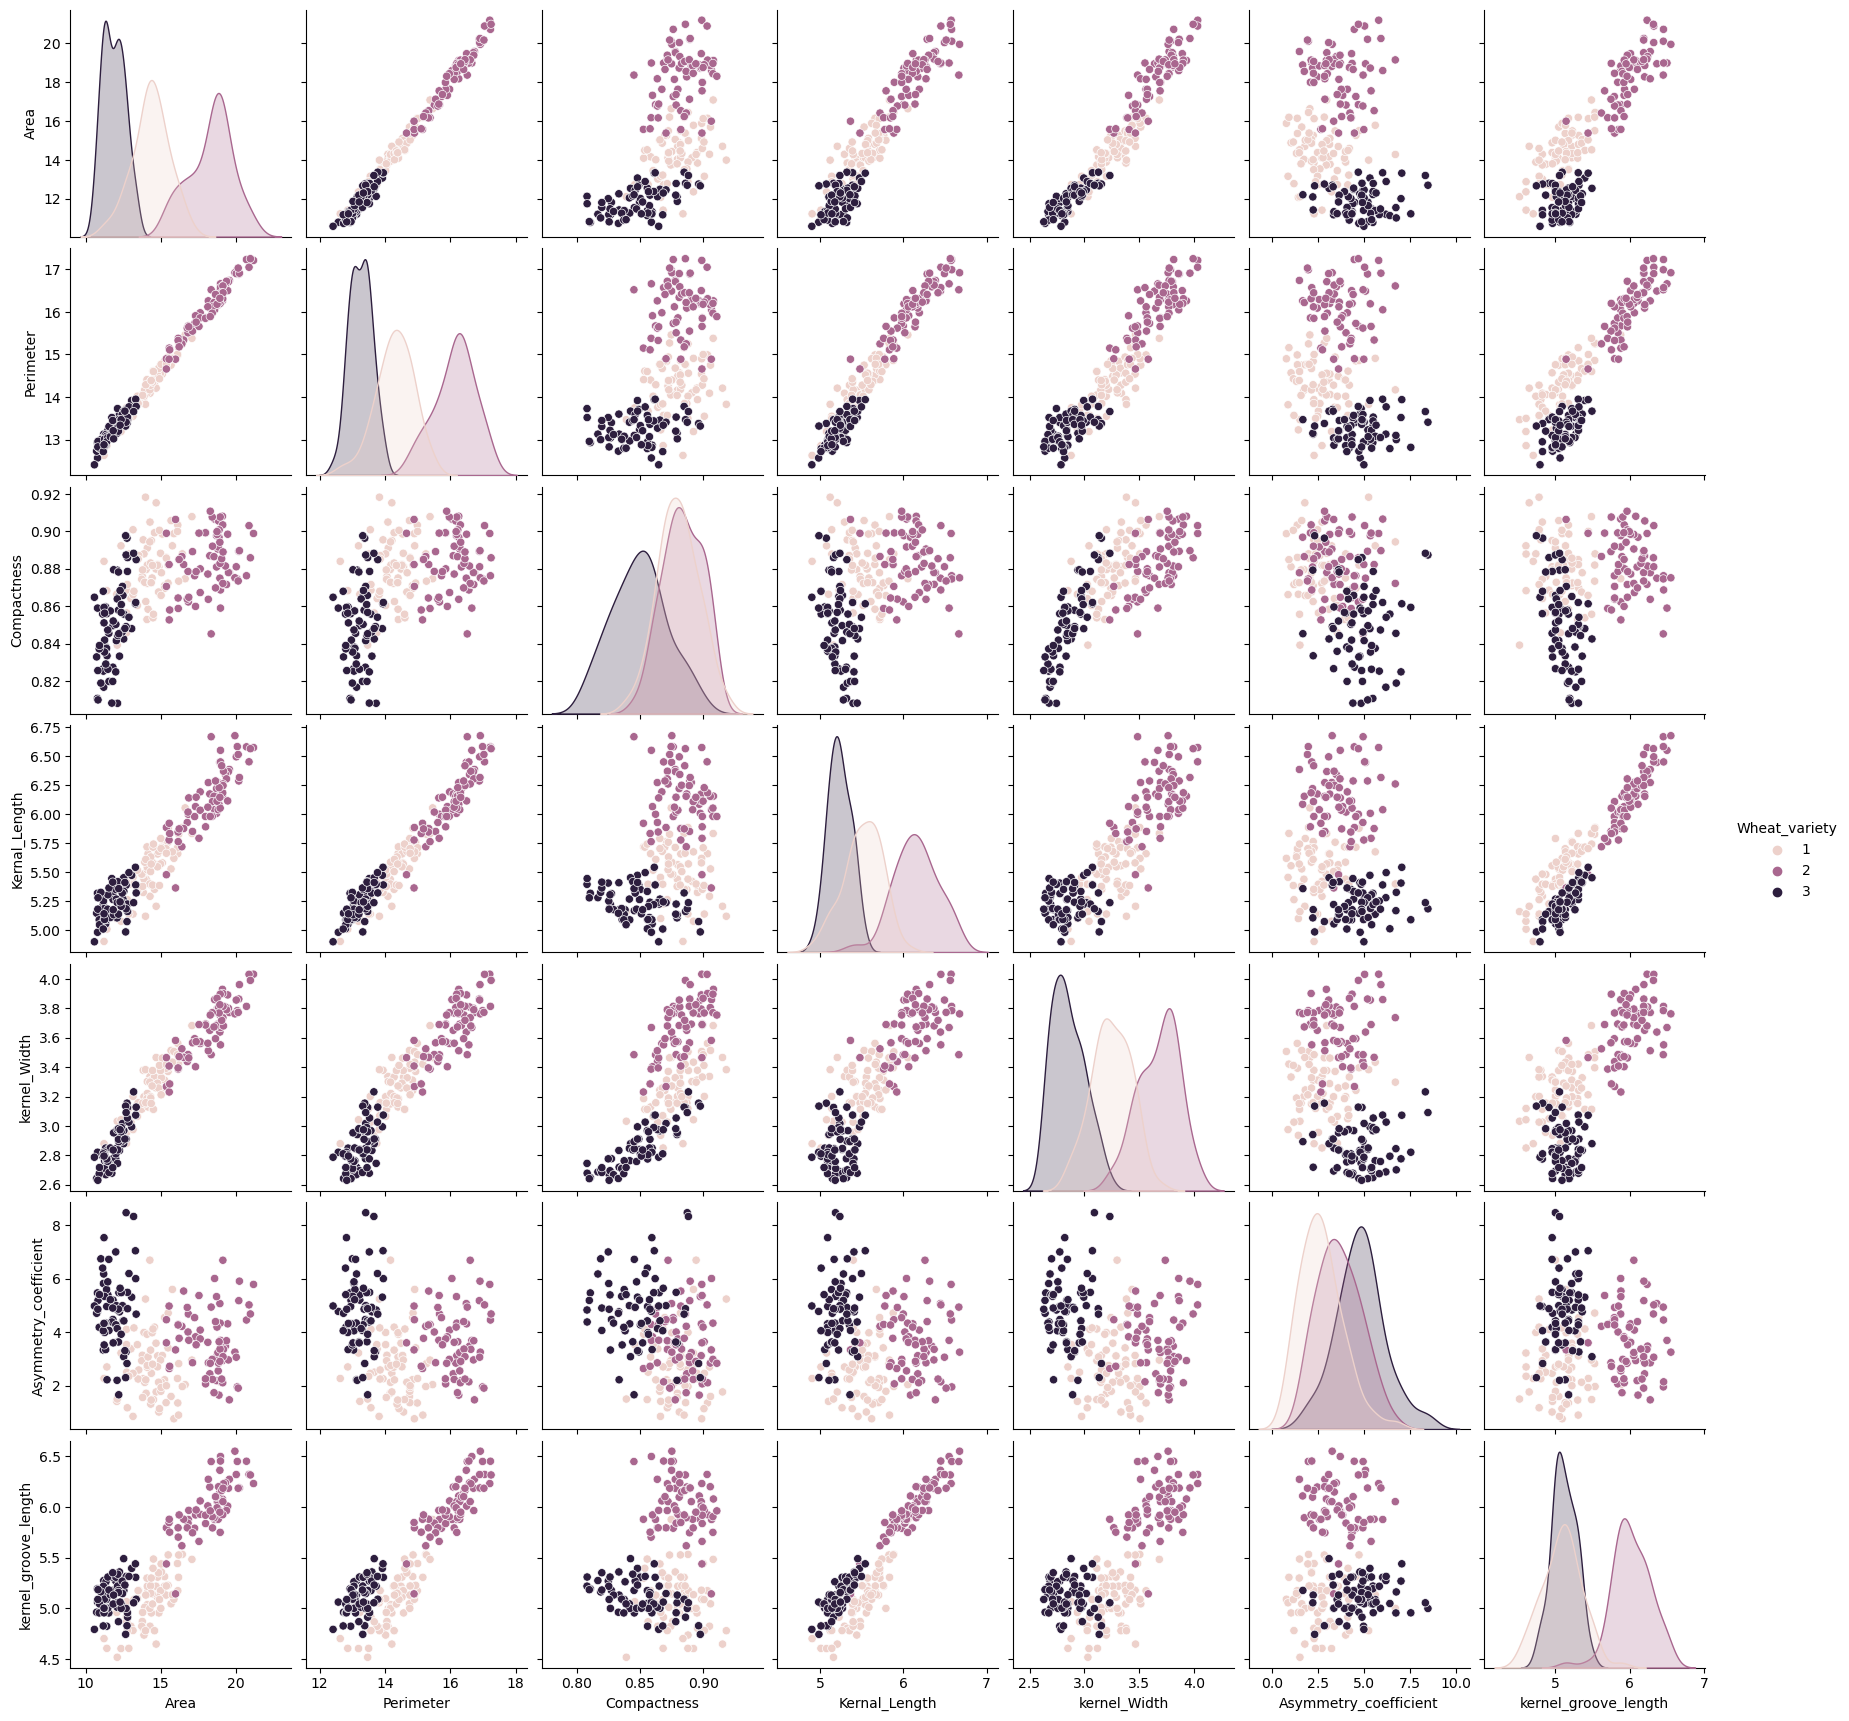

In [34]:
sns.pairplot(dataset, hue= "Wheat_variety")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
X=dataset.iloc[:,[0,1,2,3,4,5,6]].values
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

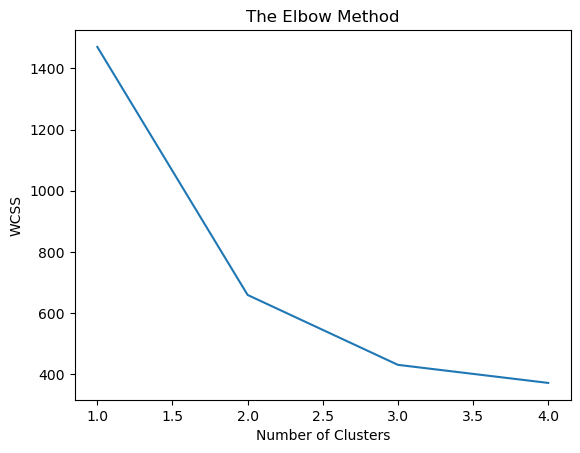

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,5):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans =KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [11]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.71874303, 0.17108184])

In [12]:
sum(pca.explained_variance_ratio_)

0.8898248618491236

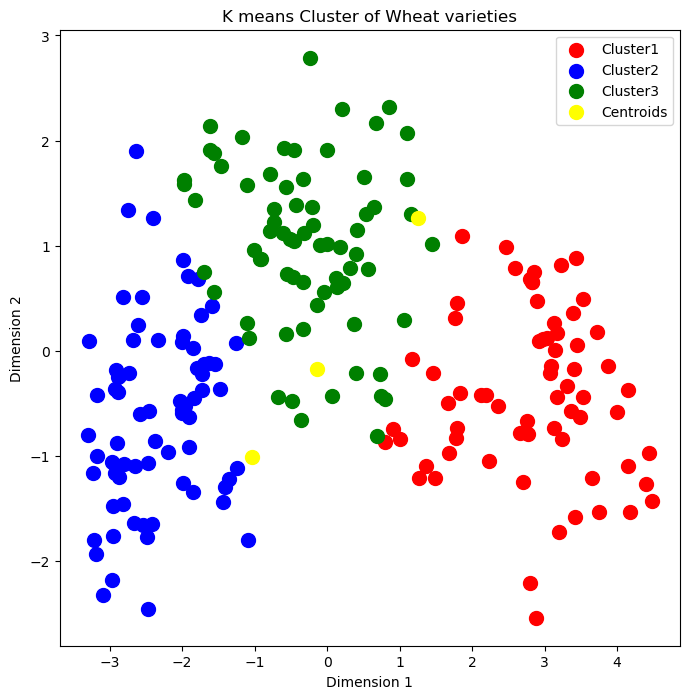

In [36]:
colours=['red','blue','green']
plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans==i,0],X_reduced[y_kmeans==i,1],s=100,c=colours[i],label='Cluster'+str(i+1))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')        
plt.title('K means Cluster of Wheat varieties')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

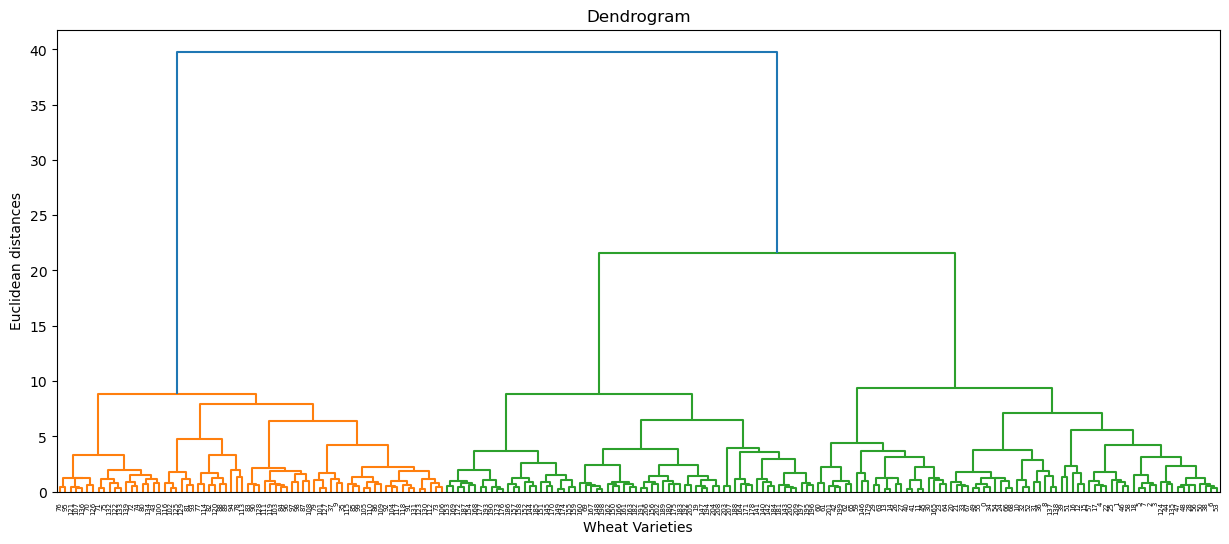

In [14]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wheat Varieties')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward' )
y_hc=hc.fit_predict(X)

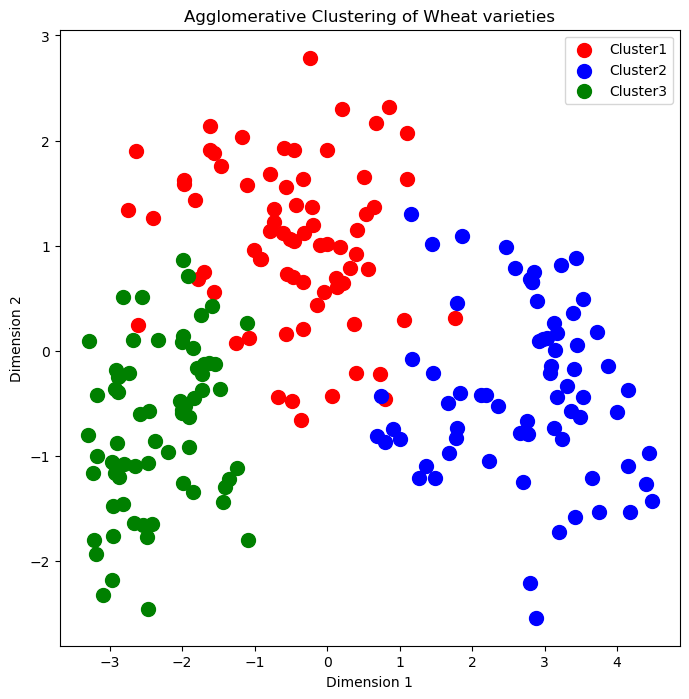

In [16]:
colours=['red','blue','green']
plt.figure(figsize=(8,8))
for i in range(3):
   plt.scatter(X_reduced[y_hc==i,0],X_reduced[y_hc==i,1],s=100,c=colours[i],label='Cluster'+str(i+1))
plt.title('Agglomerative Clustering of Wheat varieties')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()